In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/DataMl/Encounters to Diabetic Clinics MOH Hospital.csv'

In [ ]:
# prompt:  path to dataframe

import pandas as pd

df = pd.read_csv(path)
print(df.head())

   Saudi Male  Saudi female  Non-Saudi Male  Non-Saudi Female  Total  \
0       30138         41254            4918              4162  80472   
1       33194         42148            3942              2610  81894   
2        4267          4804             383               321   9775   
3       16574         19452            2536              1644  40206   
4       10901         11333             729               588  23551   

      Health Region  
0            Riyadh  
1  The Holy Capital  
2            Jeddah  
3             Ta`if  
4           Medinah  


In [ ]:


print(df.isnull().sum())

Saudi Male          0
Saudi female        0
Non-Saudi Male      0
Non-Saudi Female    0
Total               0
Health Region       0
dtype: int64


In [ ]:
df['Health Region']

,Health Region
0,Riyadh
1,The Holy Capital
2,Jeddah
3,Ta`if
4,Medinah
5,Qaseem
6,Eastern
7,Al-Ahsa
8,Hafr Al-Baten
9,Aseer


In [ ]:
total_health_region = df.groupby('Health Region')['Total'].sum()
print(total_health_region)


Health Region
 Ha`il               26700
 Najran              21068
 Qaseem              50902
Al-Ahsa               9888
Al-Bahah             21016
Al-Jouf              14534
Aseer                81356
Bishah               15131
Eastern              27948
Hafr Al-Baten        12707
Jazan                50330
Jeddah                9775
Medinah              23551
Northern Borders     16095
Qunfudah              2616
Qurrayat             18468
Riyadh               80472
Ta`if                40206
Tabouk               12720
The Holy Capital     81894
Total               617377
Name: Total, dtype: int64


##The highest / lowest  numbers of total visits ?

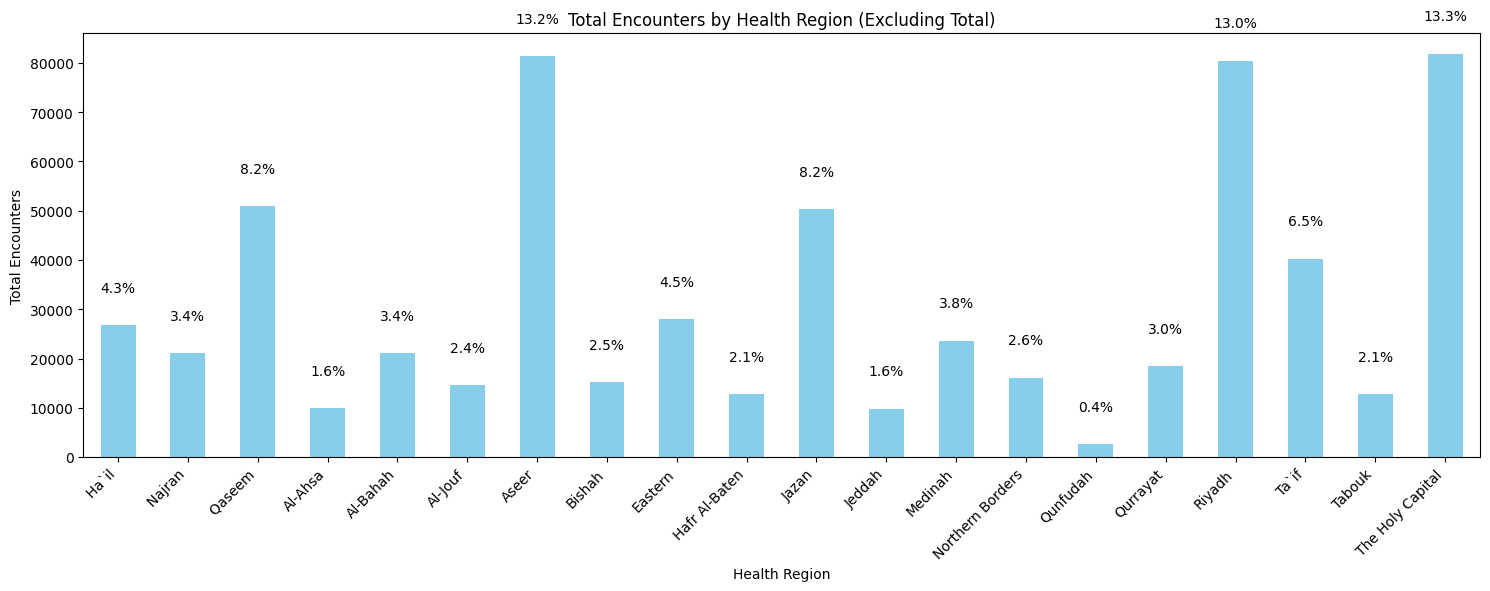

In [ ]:
import matplotlib.pyplot as plt

# Filter out the 'Total' entry
filtered_health_region = total_health_region[total_health_region.index != 'Total']

# حساب النسب المئوية
total_sum = filtered_health_region.sum()
percentages = (filtered_health_region / total_sum) * 100

# رسم الأعمدة
ax = filtered_health_region.plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Total Encounters by Health Region (Excluding Total)')
plt.xlabel('Health Region')
plt.ylabel('Total Encounters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# إضافة النسبة المئوية فوق كل عمود
for i, (value, percent) in enumerate(zip(filtered_health_region, percentages)):
    plt.text(i, value + total_sum * 0.01, f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:

max_health_region = filtered_health_region.idxmax()
max_value = filtered_health_region.max()

print(f"\nHealth Region with the maximum total encounters (excluding 'Total'): {max_health_region}")
print(f"Maximum Total Encounters: {max_value}")


Health Region with the maximum total encounters (excluding 'Total'): The Holy Capital
Maximum Total Encounters: 81894


In [ ]:

min_health_region = filtered_health_region.idxmin()
min_value = filtered_health_region.min()

print(f"\nHealth Region with the minimum total encounters (excluding 'Total'): {min_health_region}")
print(f"Minimum Total Encounters: {min_value}")


Health Region with the minimum total encounters (excluding 'Total'): Qunfudah
Minimum Total Encounters: 2616


##The total  number of gender for each health region :

In [ ]:
grouped_saudi = df.groupby('Health Region')[['Saudi Male', 'Saudi female']].sum()
print(grouped_saudi)


                  Saudi Male  Saudi female
Health Region                             
 Ha`il                  9848         15960
 Najran                 7591          9643
 Qaseem                19110         29991
Al-Ahsa                 3385          6267
Al-Bahah                9885         11010
Al-Jouf                 6029          8505
Aseer                  36722         43435
Bishah                  7404          7605
Eastern                13131         13080
Hafr Al-Baten           4270          7748
Jazan                  22674         24698
Jeddah                  4267          4804
Medinah                10901         11333
Northern Borders        6607          5234
Qunfudah                1020          1580
Qurrayat                6426         10271
Riyadh                 30138         41254
Ta`if                  16574         19452
Tabouk                  5267          6306
The Holy Capital       33194         42148
Total                 254443        320324


In [ ]:
grouped_non_saudi = df.groupby('Health Region')[['Non-Saudi Female', 'Non-Saudi Male']].sum()
print(grouped_non_saudi)


                  Non-Saudi Female  Non-Saudi Male
Health Region                                     
 Ha`il                         424             468
 Najran                       1455            2379
 Qaseem                        821             980
Al-Ahsa                        133             103
Al-Bahah                        41              80
Al-Jouf                          0               0
Aseer                          505             694
Bishah                          21             101
Eastern                        775             962
Hafr Al-Baten                  333             356
Jazan                         1195            1763
Jeddah                         321             383
Medinah                        588             729
Northern Borders              1270            2984
Qunfudah                         3              13
Qurrayat                       852             919
Riyadh                        4162            4918
Ta`if                         1

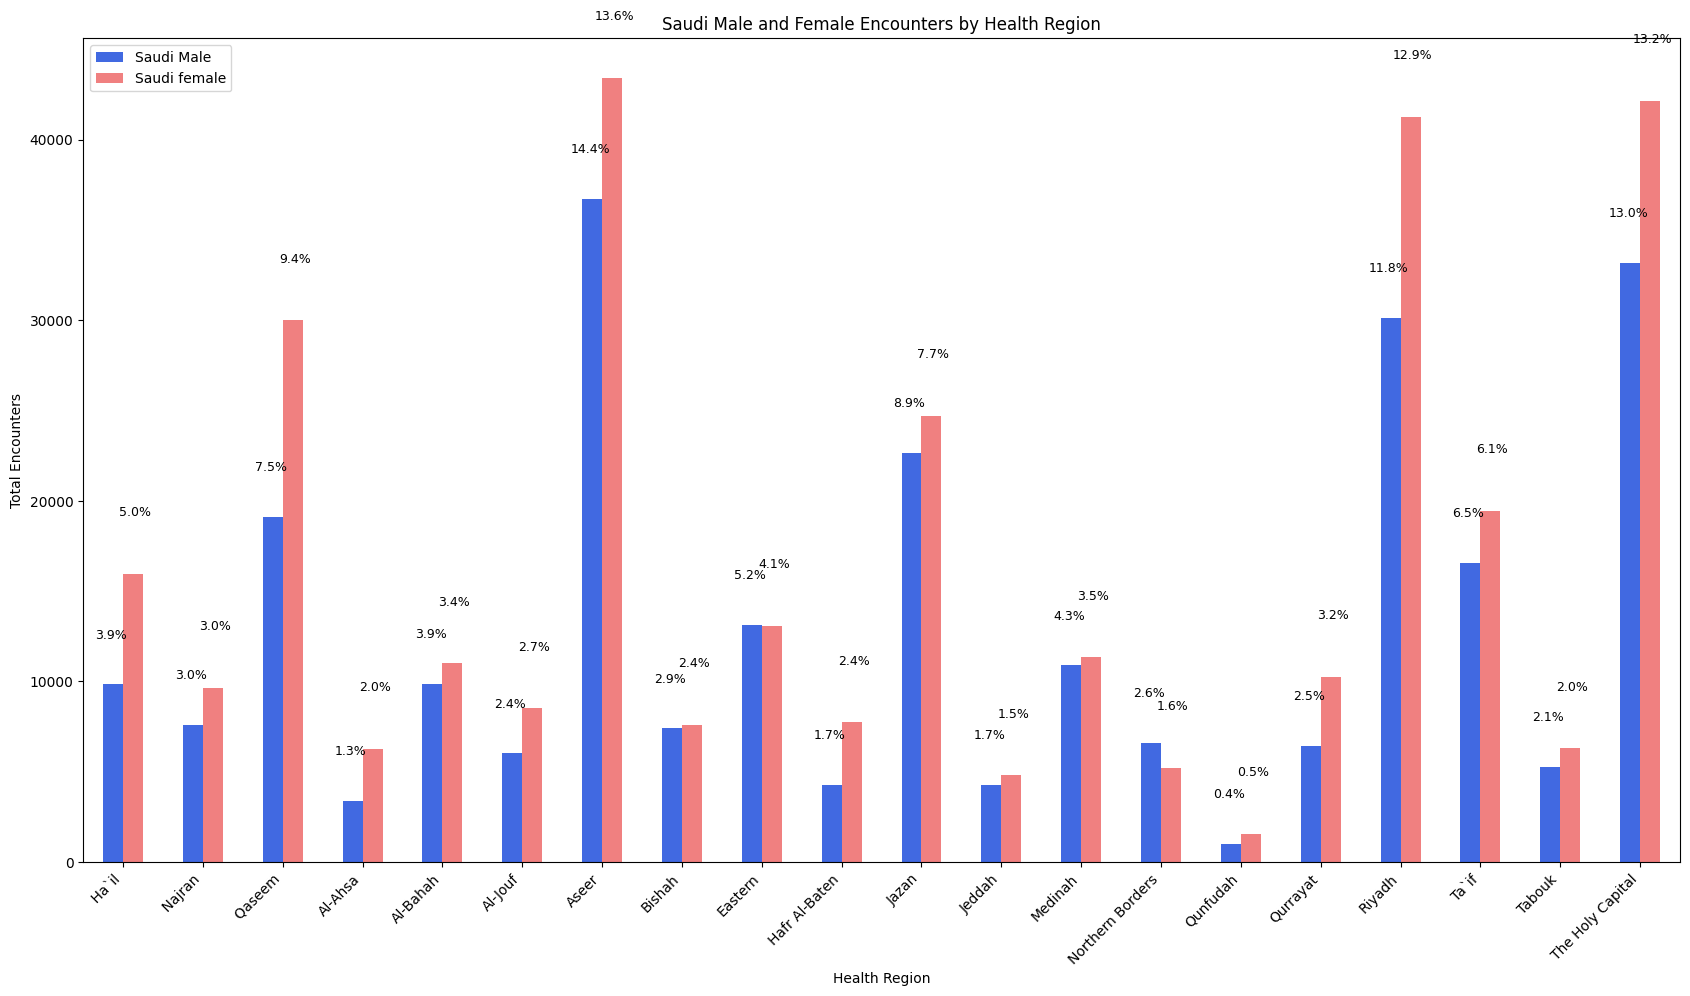

In [ ]:
import matplotlib.pyplot as plt

# استبعاد Total
grouped_saudi_filtered = grouped_saudi[grouped_saudi.index != 'Total']

# حساب الإجمالي العام لكل فئة (ذكر وأنثى)
total_male = grouped_saudi_filtered['Saudi Male'].sum()
total_female = grouped_saudi_filtered['Saudi female'].sum()

# رسم الأعمدة
ax = grouped_saudi_filtered.plot(kind='bar', figsize=(17,10), color=['royalblue', 'lightcoral'])
plt.title('Saudi Male and Female Encounters by Health Region')
plt.xlabel('Health Region')
plt.ylabel('Total Encounters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# إضافة النسبة المئوية فوق كل عمود
for i, region in enumerate(grouped_saudi_filtered.index):
    male_val = grouped_saudi_filtered.loc[region, 'Saudi Male']
    female_val = grouped_saudi_filtered.loc[region, 'Saudi female']

    male_pct = male_val / total_male * 100
    female_pct = female_val / total_female * 100

    ax.text(i - 0.15, male_val + total_male * 0.01, f"{male_pct:.1f}%", ha='center', fontsize=9, color='black')
    ax.text(i + 0.15, female_val + total_female * 0.01, f"{female_pct:.1f}%", ha='center', fontsize=9, color='black')

plt.show()


##Compare  the saudi / non saudi visited the clinic

In [ ]:


print("Total Saudi Male Encounters:", grouped_saudi['Saudi Male'].sum())

Total Saudi Male Encounters: 508886


In [ ]:
print("Total Saudi female Encounters:", grouped_saudi['Saudi female'].sum())

Total Saudi female Encounters: 640648


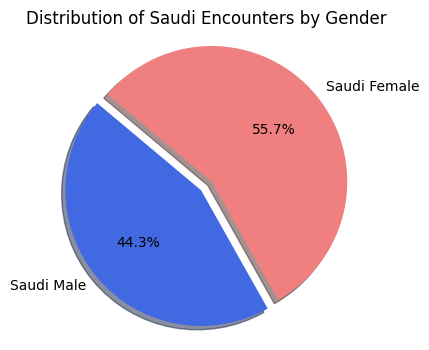

In [ ]:
# prompt: bia chart for femal saudi male saudi

import matplotlib.pyplot as plt
# Calculate total encounters for Saudi male and Saudi female
total_saudi_male = grouped_saudi['Saudi Male'].sum()
total_saudi_female = grouped_saudi['Saudi female'].sum()

# Create data for the pie chart
labels = ['Saudi Male', 'Saudi Female']
sizes = [total_saudi_male, total_saudi_female]
colors = ['royalblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (Saudi Male)

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Saudi Encounters by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
print("Total Non-Saudi Female:", grouped_non_saudi['Non-Saudi Female'].sum())

Total Non-Saudi Female: 35294


In [ ]:
print("Total Non-Saudi Female:", grouped_non_saudi['Non-Saudi Male'].sum())

Total Non-Saudi Female: 49926


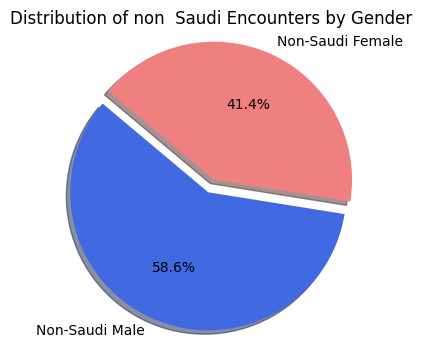

In [ ]:
# prompt: bia chart for femal saudi male saudi

import matplotlib.pyplot as plt
# Calculate total encounters for Saudi male and Saudi female
total_non_saudi_male = grouped_non_saudi['Non-Saudi Male'].sum()
total_non_saudi_female =grouped_non_saudi['Non-Saudi Female'].sum()

# Create data for the pie chart
labels = ['Non-Saudi Male', 'Non-Saudi Female']
sizes = [total_non_saudi_male, total_non_saudi_female]
colors = ['royalblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (Saudi Male)

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of non  Saudi Encounters by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


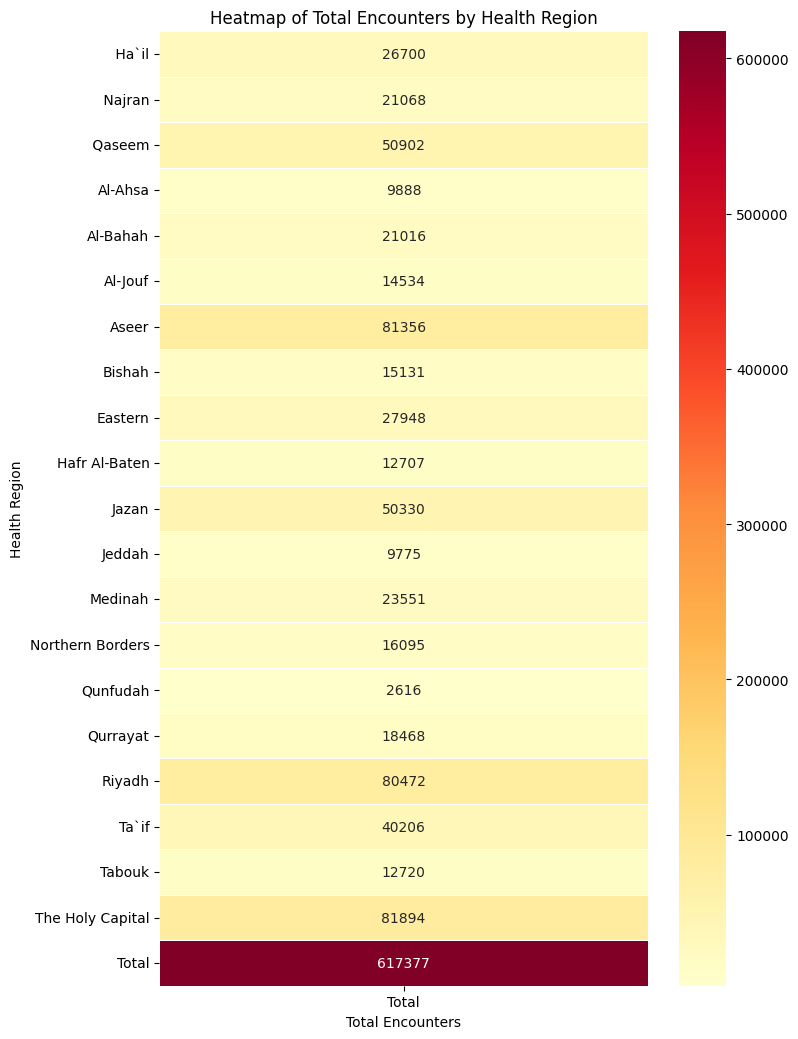

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# إنشاء عمود Total إذا غير موجود
if 'Total' not in df.columns:
    df['Total'] = df[['Saudi Male', 'Saudi Female', 'Non-Saudi Male', 'Non-Saudi Female']].sum(axis=1)

# تجميع الإجمالي حسب Health Region
total_by_region = df.groupby('Health Region')['Total'].sum().reset_index()

# تحويل البيانات إلى شكل مناسب للخريطة (مصفوفة 2D)
heatmap_df = total_by_region.pivot_table(index='Health Region', values='Total')

# رسم الخريطة الحرارية
plt.figure(figsize=(8, len(heatmap_df) * 0.5))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5)
plt.title('Heatmap of Total Encounters by Health Region')
plt.xlabel('Total Encounters')
plt.ylabel('Health Region')
plt.tight_layout()
plt.show()


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
st.subheader("📍 إجمالي الزيارات حسب المنطقة الصحية")
fig, ax = plt.subplots(figsize=(15, 6))
filtered_health_region.plot(kind='bar', ax=ax, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Total Encounters by Health Region (Excluding Total)')
plt.xlabel('Health Region')
plt.ylabel('Total Encounters')
# إضافة النسب المئوية فوق الأعمدة
for i, (value, percent) in enumerate(zip(filtered_health_region, percentages)):
    plt.text(i, value + total_sum * 0.01, f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)

st.pyplot(fig)

max_region = filtered_health_region.idxmax()
min_region = filtered_health_region.idxmin()
st.success(f"✅ أكثر منطقة زيارات: {max_region}")
st.warning(f"🔻 أقل منطقة زيارات: {min_region}")

#---------------------------------------------------------------------------------------------
# تحليل حسب الجنسية
st.subheader("👥 تحليل زيارات السعوديين وغير السعوديين حسب المنطقة")

# السعوديين
grouped_saudi = df.groupby('Health Region')[['Saudi Male', 'Saudi female']].sum()
st.markdown("### 🇸🇦 السعوديين")
st.dataframe(grouped_saudi)


st.markdown("###معدل الزيارة للإناث والذكور السعوديين  لكل منطقة ")

# استبعاد Total
grouped_saudi_filtered = grouped_saudi[grouped_saudi.index != 'Total']

# حساب الإجمالي العام لكل فئة (ذكر وأنثى)
total_male = grouped_saudi_filtered['Saudi Male'].sum()
total_female = grouped_saudi_filtered['Saudi female'].sum()

# رسم الأعمدة باستخدام fig, ax
fig, ax = plt.subplots(figsize=(17,10))
grouped_saudi_filtered.plot(kind='bar', ax=ax, color=['royalblue', 'lightcoral'])

ax.set_title('Saudi Male and Female Encounters by Health Region')
ax.set_xlabel('Health Region')
ax.set_ylabel('Total Encounters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# إضافة النسبة المئوية فوق كل عمود
for i, region in enumerate(grouped_saudi_filtered.index):
    male_val = grouped_saudi_filtered.loc[region, 'Saudi Male']
    female_val = grouped_saudi_filtered.loc[region, 'Saudi female']

    male_pct = male_val / total_male * 100
    female_pct = female_val / total_female * 100

    ax.text(i - 0.15, male_val + total_male * 0.01, f"{male_pct:.1f}%", ha='center', fontsize=9, color='black')
    ax.text(i + 0.15, female_val + total_female * 0.01, f"{female_pct:.1f}%", ha='center', fontsize=9, color='black')

# عرض الرسم في Streamlit
st.subheader("📊 مقارنة زيارات السعوديين (ذكر/أنثى) حسب المنطقة")
st.pyplot(fig)


st.markdown("###مقارنه بين نسبه الذكور والاناث على مستوى جميع المناطق ")

# حساب إجمالي الزيارات للذكور والإناث السعوديين
total_saudi_male = grouped_saudi['Saudi Male'].sum()
total_saudi_female = grouped_saudi['Saudi female'].sum()

# إعداد بيانات الرسم
labels = ['Saudi Male', 'Saudi Female']
sizes = [total_saudi_male, total_saudi_female]
colors = ['royalblue', 'lightcoral']
explode = (0.1, 0)  # تفجير بسيط لأول شريحة

# إنشاء الرسم الدائري باستخدام fig و ax
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.set_title('📊 التوزيع النسبي لزيارات السعوديين حسب الجنس')
ax.axis('equal')  # لجعل الدائرة متساوية

# عرض الرسم في ستريملت
st.pyplot(fig)

#--------------------------------------------------------------------------------------------
# غير السعوديين
grouped_non_saudi = df.groupby('Health Region')[['Non-Saudi Male', 'Non-Saudi Female']].sum()
st.markdown("### 🌍 غير السعوديين")
st.dataframe(grouped_non_saudi)




# حساب إجمالي الزيارات لغير السعوديين (ذكور وإناث)
total_non_saudi_male = grouped_non_saudi['Non-Saudi Male'].sum()
total_non_saudi_female = grouped_non_saudi['Non-Saudi Female'].sum()

# إعداد بيانات الرسم
labels = ['Non-Saudi Male', 'Non-Saudi Female']
sizes = [total_non_saudi_male, total_non_saudi_female]
colors = ['royalblue', 'lightcoral']
explode = (0.1, 0)  # تفجير بسيط لأول شريحة

# إنشاء الرسم الدائري باستخدام fig و ax
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title('📊 Distribution of Non-Saudi Encounters by Gender')
ax.axis('equal')  # لجعل الدائرة متساوية

# عرض الرسم في Streamlit
st.pyplot(fig)





